# **GCN Kipf Keras version**

## Environment Setup

**Cairo lib for plotting**

In [0]:
# PENDING
!sudo apt-get install libcairo2-dev

In [0]:
!pip install pycairo networkx

**igraph for Python**

In [0]:
!pip install python-igraph 

**Download code from github repo**

In [0]:
from getpass import getpass
import os

user = getpass('Github user')
password = getpass('Github password')
os.environ['GIT_AUTH'] = user + ':' + password
!git clone https://$GIT_AUTH@github.com/presmerats/csn-project.git
!ls -la

In [0]:
#!rm -r ./csn-project

**Install the gcn code in order to execute it later**

In [0]:
!cp -r ./csn-project/src/gcn/gcn/* ./
!python setup.py install

In [0]:
!ls -la

**Default GCN Demo**

In [0]:
!cp -r ./gcn/* .
!python train.py

In [0]:
!ls data

**Prepare a random graph with igraph for python**

In [0]:
from igraph import *
import igraph.test
igraph.test.run_tests()

In [7]:
g = Graph.Tree(127, 2)
summary(g)

IGRAPH U--- 127 126 -- 


In [9]:
g = Graph.GRG(100, 0.2)
summary(g)

IGRAPH U--- 100 499 -- 
+ attr: x (v), y (v)


In [10]:
g = Graph.Erdos_Renyi(100, 0.2)
summary(g)

IGRAPH U--- 100 983 -- 


In [15]:
g = Graph.Watts_Strogatz(1, 100, 4, 0.5 )
summary(g)

IGRAPH U--- 100 400 -- 


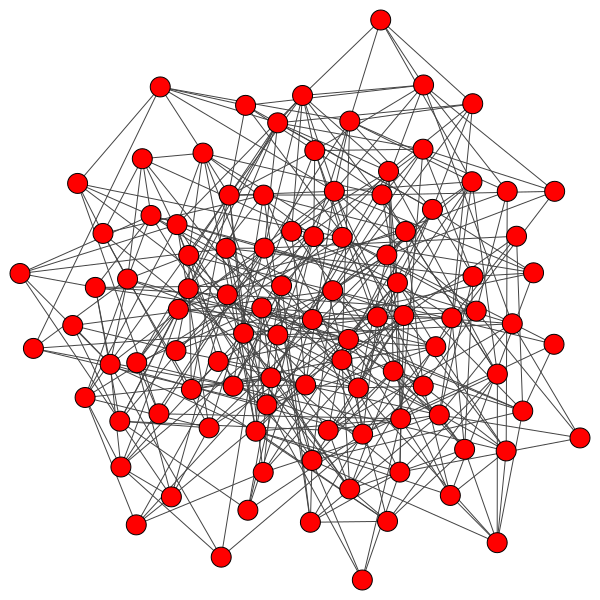

In [17]:
layout = g.layout("large")
plot(g, layout = layout)

In [19]:
g = Graph.Barabasi(100 )
summary(g)

IGRAPH U--- 100 99 -- 


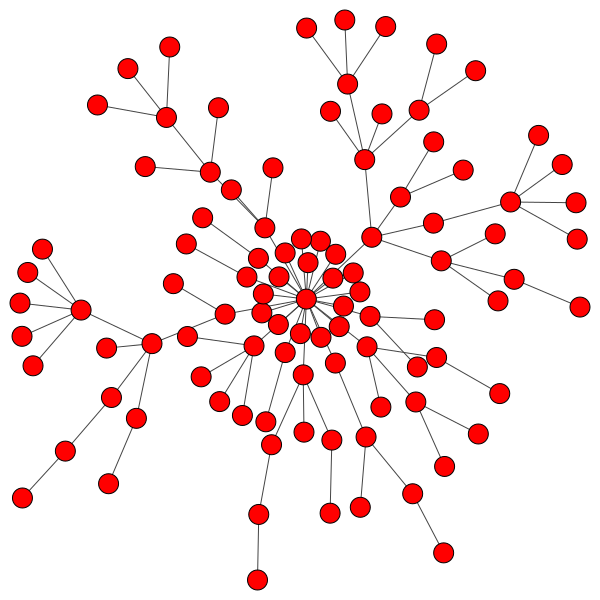

In [21]:
layout = g.layout("kk")
plot(g, layout = layout)

**Input this random graph to gcn and train and test**

**Example Keras code**

In [0]:
import numpy as np
import matplotlib.pyplot as plt

import keras
keras.__version__

In [0]:
# Training Data
train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167, 
                      7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                      2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]
print('Number of samples:', n_samples)

In [0]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(1, activation=None, input_shape=(1,)))

In [0]:
# Graphic display *before* training
W, b = [np.asscalar(v) for v in model.layers[0].get_weights()]
plt.plot(train_X, train_Y, 'ro', label='Original data')
plt.plot(train_X, W * train_X + b, label='Fitted line')
plt.legend()
plt.show()

In [0]:
model.compile(optimizer=keras.optimizers.Adam(lr=0.01), 
              loss='mean_squared_error')

In [0]:
model.fit(train_X, train_Y, epochs=100, batch_size=1)

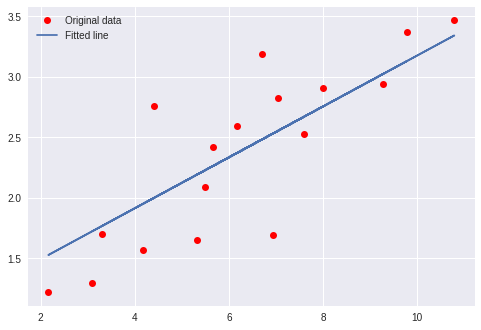

In [0]:
# Graphic display *after* training
W, b = [np.asscalar(v) for v in model.layers[0].get_weights()]
plt.plot(train_X, train_Y, 'ro', label='Original data')
plt.plot(train_X, W * train_X + b, label='Fitted line')
plt.legend()
plt.show()

## Next steps

Keras provides a [dataset](https://keras.io/datasets/#boston-housing-price-regression-dataset) with house attributes and pricing in Boston in the 1970s. Can you train a model that predicts the price of a house it has never seen given its attributes?

Note: unlike in this simple example, you will be working with two data splits (train and test). Remember that the test data is only used for evaluation, as it can give us a measure of how good the model is when making predictions for data it has never seen.

Tip: machine learning models usually work better when all inputs have a similar range. Try to normalize the data that is fed to the model by subtracting the mean and dividing by the standard deviation for each input dimension.

In [0]:
from keras.datasets import boston_housing

(train_X, train_Y), (test_X, test_Y) = boston_housing.load_data()

In [0]:
# non standardized data
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(1, activation=None, input_shape=(13,)))
model.compile(optimizer=keras.optimizers.Adam(lr=0.01), 
              loss='mean_squared_error')
model.fit(train_X, train_Y, epochs=100, batch_size=1)

In [0]:
# compute the test error
test_error = model.evaluate(test_X, test_Y, verbose=1, batch_size=1)
print(test_error)

In [0]:
# standardization of the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(train_X)
sd_train_X = scaler.transform(train_X)
train_Y = train_Y
sd_test_X = scaler.transform(x_test)
test_Y = y_test

In [0]:
# fit the model again with standardized data
model = models.Sequential()
model.add(layers.Dense(1, activation=None, input_shape=(13,)))
model.compile(optimizer=keras.optimizers.Adam(lr=0.01), 
              loss='mean_squared_error')
model.fit(sd_train_X, train_Y, epochs=100, batch_size=1)

In [0]:
# compute the test error
test_error = model.evaluate(sd_test_X, test_Y, verbose=1, batch_size=1)
print(test_error)